In [1]:
!pip install -q beautifulsoup4==4.12.2 PyMuPDFb==1.24.10 PyMuPDF==1.24.13 tqdm==4.66.5 duckdb==0.10.0 tabulate==0.9.0 plotly==5.20.0 python-dotenv openai==1.42.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.8/17.8 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.9/362.9 kB 6.3 MB/s eta 0:00:00


In [2]:
SYMBOL = "PTT"

In [3]:
import requests
import pandas as pd
import re


session = requests.Session()
session.get(f"https://www.settrade.com/th/equities/quote/{SYMBOL}/financial-statement/full")


headers = {
    'accept': 'application/json, text/plain, */*',
    'accept-language': 'en-TH,en;q=0.9,th-TH;q=0.8,th;q=0.7,en-GB;q=0.6,en-US;q=0.5',
    # 'cookie': 'visid_incap_2685215=l/JAPqmmR8KSk7rLhs3BzKvPSGYAAAAAQUIPAAAAAABALhVFFEmAe3vRYqQgqqQo; exp_history={"go_expid":"5AD93i4KR9-ZVNOhL9Vr2w-V2","msgt":"popup","count":1}; _cc_id=4d4cfaa1a003693b7c5cc45baf0913e9; __gads=ID=f9d48026689a99be:T=1716047793:RT=1716047793:S=ALNI_Ma_zJhrDoYFiXyfutD1XSHxPWA3Uw; __gpi=UID=00000e2256455e78:T=1716047793:RT=1716047793:S=ALNI_Mby0wdaHRd_h-eJjYJY5wLHS0TJAQ; __eoi=ID=2567fce2f1c28622:T=1716047793:RT=1716047793:S=AA-AfjaTaPE5D-KD9jKsPW8xY0gE; cto_bundle=44weE19pQlBrWWZRQUdySnclMkJmNXlkNkk4blI2MTgwTGNzSUZGSSUyRjRjdGRsUUZMZ1pWSDViOHIlMkY1c3lHc0NuZjBReDUlMkZVd21FT3piZkJ0MmE3bEEyRCUyQlVqYlFWbWpGVkQ0S1gxMlZUQTdIZXV3T05iN2VqbGZKWlNqRnloTm5jT3ltTnBCS1kzc3lxVWFUVEcxWFhHd2FnUjdCb1VMRWFzcmJKaG1SWm0lMkZqJTJGcE03c0UwJTJGYXRHU3FpUiUyQlhSRWlhMkxNd2o; cto_bidid=b-mYHF9lQlh6WHpHZHNta0hieDFuZ21FQ2dKQjdWRnR2RHNydllBQ2hkZEhOb1RxRzFhM1hGU29zbDgxcVdHOTFCQm1jJTJCb0ZaOVdGdjBPcCUyQnVmTGVVTUJHUmtCNDVkNTBOM1ZMdG9sVWg2OER1TFZDaENRNFElMkZjTjYwaFpGY0lsV3hjUUozZ2NUJTJGRG1KWWl5QlNqWWE5TVlKUSUzRCUzRA; visid_incap_2868064=9TnELvraSEyQ3rCeC/3tp6/imGYAAAAAQUIPAAAAAABQXj/9u+lgqIuVKksYLcer; _ga_W7C0TNQT63=GS1.1.1721377038.3.1.1721377082.0.0.0; charlot=6a8621f0-cdcf-45a6-b1c2-f81785e2d02f; _gcl_au=1.1.1685208698.1724255273; _gid=GA1.2.1052211754.1724255275; api_call_counter=5; SET_COOKIE_POLICY=20231111093657; nlbi_2685215=IC0uOhgeyBy9J7BzwZdY4QAAAAAqEQh9oBWiKDUUC927BZYM; _cbclose=1; _cbclose64035=1; route=0f35441e6abd8a06b9ca7c7f54fa2b5e; incap_ses_235_2685215=SjIpB/f0VXZxsG4/XeNCAyHexmYAAAAA4/zIE2DbjM+Hy9alp/2MXA==; landing_url=https://www.settrade.com/th/equities/quote/OR/overview?_gl=1%2a9iyx2w%2a_gcl_au%2aMTYwODA1NzI0NS4xNzIzNjQzNjg2%2a_ga%2aMTgyMzgyMTUxNS4xNzE1NTk1MjY5%2a_ga_ET2H60H2CB%2aMTcyNDI1NTIxMS4yNi4xLjE3MjQyNTU0ODguNDkuMC4w; _uid64035=DB23855A.7; _ctout64035=1; _gat_UA-29750633-11=1; _ga=GA1.1.1767658003.1716047789; _ga_W11E901KXL=GS1.1.1724324251.9.1.1724324280.31.0.0; _ga_6WS2P0P25V=GS1.1.1724324251.9.1.1724324280.31.0.0',
    'if-none-match': '"342c523b"',
    'priority': 'u=1, i',
    'referer': 'https://www.settrade.com/th/equities/quote/OR/financial-statement/full',
    'sec-ch-ua': '"Not)A;Brand";v="99", "Google Chrome";v="127", "Chromium";v="127"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"macOS"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-origin',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/127.0.0.0 Safari/537.36',
}

def get_sheet(period: str) -> pd.DataFrame:
    params = {
        'accountType': 'balance_sheet',
        'fsType': 'company',
        'period': period,
#         'language': 'th',
        'language': 'ENG',
    }

    response = session.get(
        f'https://www.settrade.com/api/set/stock/{SYMBOL}/financialstatement',
        params=params,
        headers=headers,
    )
    response.raise_for_status()
    data = response.json()
    return pd.DataFrame(data["accounts"])

def get_business_type(symbol: str) -> str:
    response = session.get(f"https://www.settrade.com/th/equities/quote/{symbol}/overview")

    response.raise_for_status()
    text = response.text
    pattern = r'businessType:\s*"([^"]+)"'
    found = re.search(pattern, text)

    if found:
        target_data = found.group(1)
        return target_data
    else:
        print("No match found.")
        return None
    return response.json()

In [4]:
from_ = 2019
to = 2024

year_range = range(from_, to)
first_year, *year_range = year_range

In [5]:
sheet = get_sheet(f"YE_{first_year}")[["accountCode", "accountName", "amount"]]
sheet[str(first_year)] = sheet["amount"]
sheet = sheet.drop("amount", axis=1)
for year in year_range:
    sheet_by_year = get_sheet(f"YE_{year}")[["accountCode", "accountName", "amount"]]
    sheet_by_year[str(year)] = sheet_by_year["amount"]
    sheet_by_year = sheet_by_year.drop("amount", axis=1)

    sheet = pd.merge(sheet, sheet_by_year, on="accountCode", how='outer', suffixes=("", f"_{year}"))
    sheet['accountName'] = sheet['accountName'].fillna(sheet[f'accountName_{year}'])
    sheet = sheet.drop(f'accountName_{year}', axis=1)

sheet


,accountCode,accountName,2019,2020,2021,2022,2023
0,100000,สินทรัพย์,NaN,NaN,NaN,NaN,NaN
1,109999,รวมสินทรัพย์,8.896762e+08,8.993883e+08,1.004906e+09,1.081772e+09,1.117391e+09
2,110000,สินทรัพย์หมุนเวียน,NaN,NaN,NaN,NaN,NaN
3,110100,เงินสดและรายการเทียบเท่าเงินสด,4.648081e+07,5.634189e+07,4.585339e+07,5.278798e+07,8.757027e+07
4,111600,เงินลงทุนระยะสั้น - สุทธิ,1.500234e+07,4.440431e+07,5.533088e+06,3.468734e+06,7.253800e+06
...,...,...,...,...,...,...,...
81,319921,ส่วนเกิน (ต่ำกว่า) ทุนจากการเปลี่ยนแปลงส่วนได้...,NaN,1.558256e+06,NaN,NaN,NaN
82,319990,องค์ประกอบอื่นของส่วนของผู้ถือหุ้น - อื่นๆ,NaN,NaN,5.247456e+06,3.240285e+06,2.055925e+06
83,319999,รวมส่วนของผู้ถือหุ้นของบริษัทใหญ่,6.073067e+08,6.230825e+08,6.375067e+08,6.287935e+08,6.627900e+08
84,900020,เงินให้กู้ยืมระยะยาว - ส่วนที่ถึงกำหนดชำระเกิน...,2.498189e+07,4.466327e+07,NaN,NaN,NaN


In [6]:
sheet["accountName"].unique()

array(['สินทรัพย์', 'รวมสินทรัพย์', 'สินทรัพย์หมุนเวียน',
       'เงินสดและรายการเทียบเท่าเงินสด', 'เงินลงทุนระยะสั้น - สุทธิ',
       'ลูกหนี้การค้าและลูกหนี้หมุนเวียนอื่น - สุทธิ',
       'เงินให้กู้ยืมระยะสั้นและดอกเบี้ยค้างรับ',
       'บุคคลหรือกิจการที่เกี่ยวข้องกัน', 'สินค้าคงเหลือ - สุทธิ',
       'สินค้าสำเร็จรูป', 'วัตถุดิบ อะไหล่และวัสดุสิ้นเปลือง',
       'สินทรัพย์อนุพันธ์ - หมุนเวียน',
       'สินทรัพย์ทางการเงินหมุนเวียนอื่น', 'ลูกหนี้หมุนเวียนอื่น',
       'สินทรัพย์ทางการเงินหมุนเวียนอื่น - อื่น ๆ',
       'สินทรัพย์หมุนเวียนอื่น', 'สินทรัพย์หมุนเวียนอื่น - อื่น ๆ',
       'รวมสินทรัพย์หมุนเวียน', 'สินทรัพย์ไม่หมุนเวียน',
       'เงินลงทุนระยะยาว - สุทธิ',
       'เงินให้กู้ยืมระยะยาวและดอกเบี้ยค้างรับ - ส่วนที่ถึงกำหนดชำระเกินกว่าหนึ่งปี',
       'เงินลงทุนในบริษัทย่อย บริษัทร่วม และการร่วมค้า ที่บันทึกด้วยวิธีอื่น - สุทธิ',
       'เงินลงทุนในบริษัทย่อย', 'เงินลงทุนในการร่วมค้า',
       'สินทรัพย์อนุพันธ์ - ไม่หมุนเวียน',
       'สินทรัพย์ทางการเงินไม่หมุนเวียนอื่น',

In [7]:
business_type = get_business_type(SYMBOL)

In [8]:
from string import Template


template = Template("""
# Context:

Stock name: ${SYMBOL}
Business type: ${business_type}

Balance sheet: ${sheet}
Structure:

${task}
""")
sheet_prompt = sheet.drop("accountCode", axis=1).astype(str).to_markdown(index=False, floatfmt=",.1f")
print(
    template.safe_substitute(
        SYMBOL=SYMBOL,
        business_type=business_type,
        sheet=sheet_prompt,
    )
)


# Context:

Stock name: PTT
Business type: ประกอบด้วยกิจการที่ ปตท. ดำเนินการเอง ได้แก่ ธุรกิจก๊าซธรรมชาติ ธุรกิจระบบท่อส่งก๊าซธรรมชาติ ธุรกิจการค้าระหว่างประเทศธุรกิจใหม่และโครงสร้างพื้นฐาน และธุรกิจที่ลงทุนผ่านบริษัทย่อยและ\u002Fหรือกิจการที่ควบคุมร่วมกันและบริษัทร่วม (กลุ่มบริษัท) ได้แก่ ธุรกิจสำรวจและผลิตปิโตรเลียม ธุรกิจก๊าซธรรมชาติเหลว ธุรกิจปิโตรเคมีและการกลั่น ธุรกิจน้ำมันและค้าปลีก ธุรกิจไฟฟ้าและสาธารณูปการ ธุรกิจให้บริการ

Balance sheet: | accountName                                                      |          2019 |          2020 |            2021 |            2022 |            2023 |
|:-----------------------------------------------------------------|--------------:|--------------:|----------------:|----------------:|----------------:|
| สินทรัพย์                                                           |         nan   |         nan   |           nan   |           nan   |           nan   |
| รวมสินทรัพย์                                                        | 889,676

# Set up LLM

In [9]:
import os
from dotenv import load_dotenv
from openai import OpenAI
import google.generativeai as genai
from typing_extensions import TypedDict
from IPython.display import Markdown
from google.colab import userdata


GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')
genai.configure(api_key=GEMINI_API_KEY)


MODEL = "typhoon-v1.5x-70b-instruct"



TYPHOON_API_KEY = userdata.get('TYPHOON_API_KEY')
MODEL = "typhoon-v1.5x-70b-instruct"
client = OpenAI(
   api_key=TYPHOON_API_KEY,
   base_url='https://api.opentyphoon.ai/v1'
)


class ChatTurn(TypedDict):
    role: str
    content: str


def get_open_ai_completion(
    prompt: str,
    model: str = MODEL,
    stream: bool = False,
    initial_message: list[ChatTurn]| None = None,
    temperature: float = 0
) -> str:
    if initial_message is None:
        initial_message = []
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model, messages=messages, temperature=temperature, stream=stream
    )
    if not stream:
        return response.choices[0].message.content
    else:
        result = ""
        for chunk in response:
            content = chunk.choices[0].delta.content
            print(content, end="")
            if isinstance(content, str):
                result += content
        return result


def get_gemini_completion(
    prompt: str,
    stream: bool = False,
) -> str:
    # model = genai.GenerativeModel("gemini-1.5-pro")
    model = genai.GenerativeModel("gemini-1.5-flash")
    response = model.generate_content(prompt)
    return response.text

In [10]:
print(f"Business type: {business_type}")

Business type: ประกอบด้วยกิจการที่ ปตท. ดำเนินการเอง ได้แก่ ธุรกิจก๊าซธรรมชาติ ธุรกิจระบบท่อส่งก๊าซธรรมชาติ ธุรกิจการค้าระหว่างประเทศธุรกิจใหม่และโครงสร้างพื้นฐาน และธุรกิจที่ลงทุนผ่านบริษัทย่อยและ\u002Fหรือกิจการที่ควบคุมร่วมกันและบริษัทร่วม (กลุ่มบริษัท) ได้แก่ ธุรกิจสำรวจและผลิตปิโตรเลียม ธุรกิจก๊าซธรรมชาติเหลว ธุรกิจปิโตรเคมีและการกลั่น ธุรกิจน้ำมันและค้าปลีก ธุรกิจไฟฟ้าและสาธารณูปการ ธุรกิจให้บริการ


In [11]:
prompt = template.safe_substitute(
    SYMBOL=SYMBOL,
    sheet=sheet_prompt,
    business_type=business_type,
    task="Analyse this stock balance sheet in Thai",
)
Markdown(get_gemini_completion(prompt))

## วิเคราะห์งบดุลของหุ้น PTT

งบดุลนี้แสดงข้อมูลทางการเงินของบริษัท ปตท. จำกัด (มหาชน) หรือ PTT ในช่วงปี 2562 ถึง 2566 

**สินทรัพย์**

* **สินทรัพย์รวม** มีแนวโน้มเพิ่มขึ้นต่อเนื่องจากปี 2562 ถึง 2566
* **สินทรัพย์หมุนเวียน** 
    * **เงินสดและรายการเทียบเท่าเงินสด** เพิ่มขึ้นอย่างต่อเนื่อง โดยเฉพาะอย่างยิ่งในปี 2566 ซึ่งอาจบ่งชี้ถึงการดำเนินงานที่แข็งแกร่ง
    * **เงินลงทุนระยะสั้น - สุทธิ** มีการลดลงในปี 2563 และ 2564 ก่อนที่จะเพิ่มขึ้นเล็กน้อยในปี 2565 และ 2566 
    * **ลูกหนี้การค้าและลูกหนี้หมุนเวียนอื่น - สุทธิ** มีแนวโน้มผันผวน แต่โดยรวมมีการเพิ่มขึ้น 
    * **เงินให้กู้ยืมระยะสั้นและดอกเบี้ยค้างรับ** ลดลงในช่วงปี 2563-2565 ก่อนที่จะเพิ่มขึ้นอย่างมากในปี 2566 
    * **สินค้าคงเหลือ - สุทธิ** มีการเพิ่มขึ้นอย่างต่อเนื่อง ซึ่งอาจสะท้อนถึงการเพิ่มขึ้นของยอดขายหรือการเตรียมพร้อมสำหรับการเติบโตในอนาคต
* **สินทรัพย์ไม่หมุนเวียน**
    * **เงินลงทุนระยะยาว - สุทธิ** ลดลงอย่างต่อเนื่อง
    * **เงินให้กู้ยืมระยะยาวและดอกเบี้ยค้างรับ - ส่วนที่ถึงกำหนดชำระเกินกว่าหนึ่งปี** มีการลดลงในปี 2565 และ 2566
    * **เงินลงทุนในบริษัทย่อย บริษัทร่วม และการร่วมค้า ที่บันทึกด้วยวิธีอื่น - สุทธิ** มีการเพิ่มขึ้นอย่างต่อเนื่อง 
    * **อสังหาริมทรัพย์เพื่อการลงทุน - สุทธิ** มีแนวโน้มผันผวน แต่โดยรวมมีการเพิ่มขึ้น 
    * **ที่ดิน อาคาร และอุปกรณ์ - สุทธิ** มีการลดลงอย่างต่อเนื่อง ซึ่งอาจบ่งชี้ถึงการขายสินทรัพย์บางส่วน
    * **สินทรัพย์สิทธิการใช้ - สุทธิ** มีการเพิ่มขึ้นอย่างต่อเนื่อง
    * **สินทรัพย์ไม่มีตัวตน - สุทธิ** ลดลงอย่างต่อเนื่อง 

**หนี้สิน**

* **หนี้สินรวม** เพิ่มขึ้นจากปี 2562 ถึง 2566
* **หนี้สินหมุนเวียน**
    * **เจ้าหนี้การค้าและเจ้าหนี้หมุนเวียนอื่น** มีแนวโน้มเพิ่มขึ้น
    * **เงินกู้ยืมระยะสั้น** เพิ่มขึ้นอย่างต่อเนื่องในปี 2565 และ 2566
    * **ส่วนของหนี้สินระยะยาวส่วนที่ถึงกำหนดชำระภายในหนึ่งปี** เพิ่มขึ้นอย่างมีนัยสำคัญในปี 2566 
* **หนี้สินไม่หมุนเวียน**
    * **หนี้สินระยะยาว - ส่วนที่ถึงกำหนดชำระเกินกว่าหนึ่งปี** มีการเพิ่มขึ้นอย่างต่อเนื่อง 
    * **ประมาณการหนี้สินผลประโยชน์พนักงาน - ไม่หมุนเวียน** มีการลดลงในปี 2565 และ 2566

**ส่วนของผู้ถือหุ้น**

* **ส่วนของผู้ถือหุ้นรวม** มีการเพิ่มขึ้นอย่างต่อเนื่อง 
* **กำไร (ขาดทุน) สะสม** มีการเพิ่มขึ้นอย่างต่อเนื่อง ซึ่งบ่งชี้ถึงการดำเนินงานที่ทำกำไร

**สรุป**

งบดุลของ PTT แสดงให้เห็นถึงการเติบโตของธุรกิจโดยรวม ในขณะเดียวกันก็มีการเพิ่มขึ้นของหนี้สินซึ่งเป็นผลมาจากการลงทุนและการขยายธุรกิจ  การวิเคราะห์ข้อมูลในงบดุลควบคู่กับงบกำไรขาดทุนและงบกระแสเงินสด จะช่วยให้เข้าใจภาพรวมทางการเงินของ PTT ได้ดีขึ้น 

**หมายเหตุ**: การวิเคราะห์นี้เป็นเพียงการวิเคราะห์เบื้องต้น ควรพิจารณาข้อมูลเพิ่มเติม เช่น งบกำไรขาดทุน งบกระแสเงินสด อัตราส่วนทางการเงิน และปัจจัยภายนอกก่อนตัดสินใจลงทุน


In [12]:
import matplotlib
import matplotlib.font_manager as fm
from os import path
if not path.exists('Sarabun-Regular.ttf'):
    !wget https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf -O Sarabun-Regular.ttf

if 'Sarabun' not in [x.name for x in matplotlib.font_manager.fontManager.ttflist]:
    matplotlib.font_manager.fontManager.addfont('Sarabun-Regular.ttf')
matplotlib.rc('font', family='Sarabun')

--2024-11-07 06:59:27--  https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/google/fonts/main/ofl/sarabun/Sarabun-Regular.ttf [following]
--2024-11-07 06:59:28--  https://raw.githubusercontent.com/google/fonts/main/ofl/sarabun/Sarabun-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90220 (88K) [application/octet-stream]
Saving to: ‘Sarabun-Regular.ttf’

Sarabun-Regular.ttf 100%[===================>]  88.11K  --.-KB/s    in 0.008s  

2024-11-07 06:59:28 (11.2 MB/s) - ‘Sarabun-Regular.ttf’ saved [90220/90220]



KeyError: 'รวมหนี้สิน'

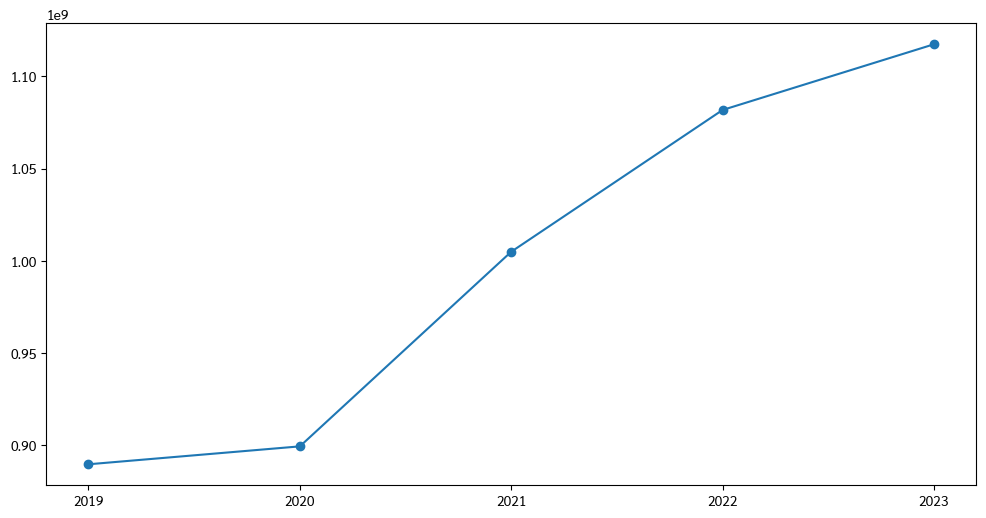

In [13]:
prompt = template.safe_substitute(
    SYMBOL=SYMBOL,
    sheet=sheet_prompt,
    business_type=business_type,
    task="""Act as finanical analyst and analyse this data and write a Python code with the following sections:

1. Comment file header and show your thought how this data can support the investors
2. Use Matplotlib to create some visualisations to ease investors. Note:
 - You need to rotate X-axis ticks with 45 degree.
 - plot legends should be outside the chartz
3. Use a string variable named "conclusion" to store your data analytics and conclusion in Markdown format in Thai language.

You must give only the answer do not add prologue, prefix and suffix.""",
)

python_code = get_gemini_completion(prompt)
exec(python_code.strip("`").lstrip("python").strip())
Markdown(conclusion)

In [14]:
prompt = template.safe_substitute(
    SYMBOL=SYMBOL,
    sheet=sheet_prompt,
    business_type=business_type,
    task="""Act as finanical analyst and analyse this data and write a Python code with the following sections:

1. Comment file header and show your thought about income structure of this company.
2. Use Plotly to create some visualisations to ease investors. Note:
 - You need to rotate X-axis ticks with 45 degree.
 - plot legends should be outside the chartz
3. Use a string variable named "conclusion" to store your data analytics and conclusion in Markdown format in Thai language.

You must give only the answer do not add prologue, prefix and suffix.""",
)

python_code = get_gemini_completion(prompt)
exec(python_code.strip("`").lstrip("python").strip())
Markdown(conclusion)

SyntaxError: unterminated string literal (detected at line 313) (<string>, line 313)

In [ ]:
prompt = template.safe_substitute(
    SYMBOL=SYMBOL,
    sheet=sheet_prompt,
    task="""Act as finanical analyst and analyse this data and write a Python code with the following sections:

1. Thought about income structure 2022 vs 2023 and write your in comment section
2. Use Plotly to create some visualisations to ease investors focusing on 2022 vs 2023. Note:
 - You need to rotate X-axis ticks with 45 degree.
 - plot legends should be outside the chartz
3. Use a string variable named "conclusion" to store your data analytics and conclusion in Markdown format in Thai language.

You must give only the answer do not add prologue, prefix and suffix.""",
    response="Python code, You must give only the answer do not add prologue, prefix and suffix."
)

python_code = get_gemini_completion(prompt)
exec(python_code.strip("`").lstrip("python").strip())
Markdown(conclusion)

# CO-STAR prompting

Ref: https://medium.com/@frugalzentennial/unlocking-the-power-of-costar-prompt-engineering-a-guide-and-example-on-converting-goals-into-dc5751ce9875


```
# Context

I am analyzing a company's financial performance. The data includes the balance sheet, income statement, and cash flow statement for each year. I am interested in understanding key financial metrics and trends, such as profitability, liquidity, and solvency, as well as identifying any significant changes in financial health.

Stock name: ${SYMBOL}
Business type: ${business_type}
Balance sheet:
${sheet}

----

# Objective

The goal is to generate insights on the company's financial performance, including:
{task}

----

# Style

Write in an informative and instructional style

---

# Tone
The tone should be financial reporting with your suggestion.

---

# Audience

Individuals interested in company's finanical performance

---

# Response

${response}
```

In [ ]:
co_star_template = Template("""
# Context

I am analyzing a company's financial performance.
The data includes the balance sheet, income statement, and cash flow statement for each year.
I am interested in understanding key financial metrics and trends, such as profitability, liquidity, and solvency, as well as identifying any significant changes in financial health.

Stock name: ${SYMBOL}
Business type: ${business_type}
Balance sheet:
${sheet}

----

# Objective

The goal is to generate insights on the company's financial performance, including:
{task}

----

# Style

Write in an informative and instructional style

---

# Tone
The tone should be financial reporting with your suggestion.

---

# Audience

Individuals interested in company's finanical performance

---

# Response

${response}
""")

In [17]:
prompt = template.safe_substitute(
    SYMBOL=SYMBOL,
    sheet=sheet_prompt,
    business_type=business_type,
    task="""
# Objective:
Answer the following questions:

1.ดูคุณภาพของบริษัท quality

1.1 วิเคราะห์งบแสดงฐานะการเงิน
1.1.1 สินทรัพย์
1.1.1.1 ดูโครงสร้างของสินทรัพย์ ว่าสินทรัพย์หมุนเวียน หรือสินทรัพย์ไม่หมุนเวียนมากกว่ากัน ถ้าบริษัทมีสินทรัพย์หมุนเวียนมากให้เน้นวิเคราะห์สภาพคล่อง ถ้าบริษัทมีสินทรัพย์ไม่หมุนเวียนเยอะให้เน้นวิเคราะห์การนำสินทรัพย์ไปสร้างรายได้
1.1.1.2 วิเคราะห์สินทรัพย์หมุนเวียน รายการส่วนใหญ่ควรเป็น เงินสด ลูกหนี้การค้า และสินค้าคงเหลือ ถ้ามีรายการอื่นมากๆให้ระวังปัญหาสภาพคล่อง
1.1.1.3 บริษัทที่ลูกหนี้การค้าเพิ่มขึ้นมากกว่าการเพิ่มของยอดขาย และอัตราส่วนระยะเวลาเก็บหนี้เพิ่มขึ้น ให้ระวังปัญหาการเก็บหนี้ และการตกแต่งงบการเงินโดยการสร้างรายได้เทียม
1.1.1.4 บริษัทที่สินค้าคงเหลือเพิ่มขึ้นมากกว่าการเพิ่มของต้นทุนขาย และอัตราส่วนระยะเวลาขายสินค้าเพิ่มขึ้น ให้ระวังปัญหาสินค้าล้าสมัยเสื่อมสภาพ
1.1.1.5 ให้ระวังบริษัทที่มีค่านิยมจำนวนมากเมื่อเทียบกับสินทรัพย์รวม เพราะอาจเป็นการเข้าซื้อกิจการราคาแพงได้ ให้ดูว่า ROA ยังสูงและสม่ำเสมอหรือไม่
1.1.1.6 บริษัทที่มีที่ดินอาคารอุปกรณ์เพิ่มสอดคล้องกับรายได้ที่เพิ่ม แสดงว่าบริษัทมีการลงทุนขยายกิจการให้เติบโต และรายได้เติบโตตาม
1.1.2 วิเคราะห์หนี้สิน
1.1.2.1 ดูโครงสร้างหข้องหนี้สินว่าสอดคล้องกับโครงสร้างสินทรัพย์หรือไม่
1.1.2.1.1ถ้าบริษัทที่มีสินทรัพย์หมุนเวียนมากกว่าสินทรัพย์ไม่หมุนเวียน หนี้สินหมุนเวียนจะมากกว่าหนี้สินไม่หมุนเวียน แสดงว่าโครงสร้างหนี้สินสอดคล้องกับสินทรัพย์
1.1.2.1.2ถ้าบริษัทที่มีสินทรัพย์หมุนเวียนน้อยกว่าสินทรัพย์ไม่หมุนเวียน หนี้สินหมุนเวียนจะน้อยกว่าหนี้สินไม่หมุนเวียน แสดงว่าโครงสร้างหนี้สินสอดคล้องกับสินทรัพย์
1.1.2.1.3 ถ้าบริษัทมีสินทรัพย์ไม่หมุนเวียนเยอะ แต่หนี้ส่วนใหญ่เป็นหนี้ระยะสั้น ให้ระวังปัญหาหนี้สิน เนื่องจากใช้เงินผิดประเภทกู้ระยะสั้นมาลงทุนระยะยาว
1.1.2.2 ให้ระวังบริษัทที่มีส่วนของหนี้สินเพิ่มขึ้นเร็วกว่าส่วนของผู้ถือหุ้นที่เพิ่มขึ้น อาจมีปัญหาหนี้สินได้ในอนาคต
1.1.3 วิเคราะห์ส่วนของผู้ถือหุ้น
1.1.3.1 ให้ระวังบริษัทที่ขาดทุนสะสมจำนวนมากเมื่อเทียบกับทุนจดทะเบียน แสดงว่าในอดีตที่ผ่านมา มีผลประกอบการขาดทุนเป็นจำนวนมาก
1.1.3.2 ให้ระวังบริษัทที่มี ตราสารหนี้เสมือนทุน จำนวนมากเมื่อเทียบกับส่วนของผู้ถือหุ้น เพราะจริงๆแล้วเป็นหนี้สินไม่ใช่ส่วนของผู้ถือหุ้น

1.2 วิเคราะห์งบกำไรขาดทุน
1.2.1 รายได้และกำไรสุทธิควรเพิ่มขึ้นอย่างต่อเนื่อง และอัตรากำไรขั้นต้น อัตรากำไรก่อนดอกเบี้ยและภาษี และอัตรากำไรสุทธิสม่ำเสมอ แสดงว่าเป็นบริษัทที่ดี เหมาะถือลงทุน
1.2.2 อัตรากำไรขั้นต้น ควรสม่ำเสมอหลายๆปีติดกัน
1.2.3 บริษัทที่อัตรากำไรขั้นต้นลดลงอาจมีปัญหาดังนี้
1.2.3.1 มีปัญหาต้นทุนหรือราคาสินค้าผันผวน
1.2.3.2 ยังใช้กำลังการผลิตไม่เต็มที่
1.2.3.3 มีปัญหาการแข่งขันกับคู่แข่งต้องลดแลกแจกแถมตัดราคาแข่งกัน
1.2.4 ค่าใช้จ่ายในการขายควรเพิ่มขึ้นสอดคล้องกับยอดขายที่เพิ่มขึ้น แสดงว่าใช้งบการตลาดได้คุ้มค่า
1.2.5ค่าใช้จ่ายในการบริหารควรเพิ่มขึ้นสอดคล้องกับยอดขายที่เพิ่มขึ้น แสดงว่าบริหารงานส่วนกลางได้ดีสอดคล้องกับยอดขาย
1.2.6 ถ้าต้นทุนทางการเงินเกิด 50% ของ กำไรก่อนดอกเบี้ยและภาษี แสดงว่ามีปัญหาจัดโครงสร้างหนี้สินมากเกินไป หรือกำไรลังอยู่ในช่วงแรกของการลงทุน

1.3 วิเคราะห์งบกระแสเงินสด
1.3.1 งบกระแสเงินสดจากกิจกรรมควรเป็นบวก แสดงว่าบริษัททำธุรกิจแล้วมีเงินงอกเงยจากการดำเนินงาน สามารถนำเงินมาลงทุนและจ่ายหนี้ต่อได้
1.3.2 งบกระแสเงินสดจากกิจกรรมดำเนินงานที่ น้อยกว่ากำไรสุทธิ แสดงว่าอาจมีกำไรพิเศษ เงินจมกับ ลูกหนี้การค้า สินค้าคงเหลือ หรือเป็นสัญญาณเบื้องต้นของการตกแต่งบัญชี
1.3.3 บริษัทที่มีเงินจ่ายกิจกรรมลงทุน รายการซื้อที่ดินอาคารอุปกรณ์ แปลงค่าเป็นบวก แล้วมากกว่าค่าเสื่อมราคา แสดงว่ามีการลงทุนสูง อาจอยู่ในช่วงเติบโตขายกิจการได้

1.4 วิเคราะห์ปัญหาธุรกิจผ่านอัตราส่วนทางการเงิน
1.4.1 ผลตอบแทนต่อส่วนของผู้ถือหุ้น ROE > 5 และสม่ำเสมอ แสดงว่าบริษัทสามารถสร้างผลตอบแทนให้กับผู้ถือหุ้นได้ดี
1.4.2 ผลตอบแทนต่อสินทรัพย์ ROA > 5 และสม่ำเสมอ แสดงว่าบริษัทสามารถนำสินทรัพย์ไปสร้างผลตอบแทนกำไรก่อนดอกเบี้ยและภาษีได้ดี
1.4.3 บริษัทที่ ROA ลดลงต่อเนือ่งแสดงว่ามีปัญหาลงทุนแล้วไม่คุ้มค่าไม่สร้างผลตอบแทนกลับมา ผลประกอบการจะเริ่มโตช้าลงได้
1.4.4 บริษัทที่อัตราส่วนหนี้สินต่อทุนมากกว่า 1.5 และ กระแสเงินสดจากกิจกรรมดำเนินงานติดลบ ให้ระมัดระวังปัญหาการจ่ายหนี้สิน
1.4.5 บริษัทที่อัตราส่วนหมุนเวียนทรัพย์สิน asset turnover มีแนวโน้มลดลง อาจอยู่ในช่วงลงทุน สินทรัพย์เพิ่มแต่รายได้ไม่เพิ่มตาม
1.4.6 ถ้าระยะเวลาเก็บหนี้เพิ่มให้ระวังปัญหาการเก็บหนี้
1.4.7 ถ้าระยะเวลาขายสินค้าเพิ่มขึ้นให้ระวังปัญหาสินค้าล้าสมัยเสื่อมสภาพ
1.4.8 ถ้าระยะเวลาชำระเจ้าหนี้เพิ่มขึ้นให้ระวังปัญหาสภาพคล่องไม่มีเงินจ่ายเจ้าหนี้การค้าต้องดึงรอบให้ยาวขึ้น
1.4.9 ถ้าบริษัทที่วงจรเงินสดยาวเกิน 75 วัน แสดงว่าต้องใช้เงินทุนหมุนเวียนเยอะ ให้ระวังปัญหาสภาพคล่อง
1.4.10 บริษัทที่อัตรากำไรขั้นต้น ลดลงอาจมีปัญหา ต้นทุนวัตถุดิบราคาสินค้า หรือ ผลิตยังไม่เต็มกำลังการผลิต หรือ ปัญหาการแข่งขั้น
1.4.11 ถ้าอัตรากำไรขั้นต้น ใกล้เคียงเดิม แต่อัตรากำไรก่อนดอกเบี้ยและภาษีลดลง แสดงว่า มีปัญหาที่ค่าใช้จ่ายในการขายและบริหาร
1.4.8 ถ้าอัตรากำไรก่อนดอกเบี้ยและภาษีใกล้เคียงเดิม แต่อัตรากำไรสุทธิลดลง แสดงว่ามีปัญหาที่ดอกเบี้ยสูง จากโครงสร้างเงินทุนที่มีหนี้สินมาก
""",
    response="Markdown in Thai language"
)

output = get_gemini_completion(prompt)
Markdown(output)

## วิเคราะห์คุณภาพของบริษัท PTT ตามงบการเงิน

**1. ดูคุณภาพของบริษัท (Quality)**

**1.1 วิเคราะห์งบแสดงฐานะการเงิน**

**1.1.1 สินทรัพย์**

* **โครงสร้างสินทรัพย์:**  PTT มีทั้งสินทรัพย์หมุนเวียนและสินทรัพย์ไม่หมุนเวียนในสัดส่วนที่สูง เนื่องจากดำเนินธุรกิจที่เกี่ยวข้องกับโครงสร้างพื้นฐานและการลงทุนในบริษัทย่อย
* **วิเคราะห์สินทรัพย์หมุนเวียน:** 
    * เงินสดและรายการเทียบเท่าเงินสด มีแนวโน้มเพิ่มขึ้นอย่างต่อเนื่อง ซึ่งเป็นสัญญาณที่ดี
    * ลูกหนี้การค้า มีแนวโน้มเพิ่มขึ้น แต่อัตราส่วนระยะเวลาเก็บหนี้ยังคงอยู่ในระดับที่เหมาะสม ดังนั้นจึงไม่น่าเป็นห่วงเรื่องการเก็บหนี้
    * สินค้าคงเหลือ มีแนวโน้มเพิ่มขึ้น และอัตราส่วนระยะเวลาขายสินค้าก็เพิ่มขึ้นเล็กน้อย อาจเป็นสัญญาณของปัญหาสินค้าล้าสมัย
    * สินทรัพย์หมุนเวียนอื่นๆ มีสัดส่วนที่ไม่มากเมื่อเทียบกับสินทรัพย์รวม แสดงว่าไม่มีปัญหาเรื่องสภาพคล่อง
* **สินทรัพย์ไม่หมุนเวียน:**
    * เงินลงทุนในบริษัทย่อย มีสัดส่วนที่สูง แสดงว่า PTT เน้นการลงทุนในบริษัทย่อยเพื่อขยายธุรกิจ
    * ที่ดิน อาคาร และอุปกรณ์ มีแนวโน้มเพิ่มขึ้นสอดคล้องกับรายได้ที่เพิ่ม แสดงว่าบริษัทมีการลงทุนขยายกิจการให้เติบโตและรายได้เติบโตตาม
    * สินทรัพย์ไม่มีตัวตน มีสัดส่วนที่ไม่มาก

**1.1.2 วิเคราะห์หนี้สิน**

* **โครงสร้างหนี้สิน:** PTT มีทั้งหนี้สินหมุนเวียนและหนี้สินไม่หมุนเวียน ในสัดส่วนที่สูง  โครงสร้างหนี้สินดูจะสอดคล้องกับโครงสร้างสินทรัพย์
* **หนี้สินระยะสั้น:** PTT มีหนี้สินระยะสั้นในสัดส่วนที่ไม่สูงมาก 
* **หนี้สินระยะยาว:** PTT มีหนี้สินระยะยาวในสัดส่วนที่สูง แต่การเพิ่มขึ้นของหนี้สินไม่เร็วกว่าการเพิ่มขึ้นของส่วนของผู้ถือหุ้น ดังนั้นจึงไม่น่าเป็นห่วงปัญหาหนี้สิน

**1.1.3 วิเคราะห์ส่วนของผู้ถือหุ้น**

* **ทุนจดทะเบียน:** PTT มีทุนจดทะเบียนที่คงที่
* **กำไร (ขาดทุน) สะสม:** PTT มีกำไรสะสมในจำนวนมาก แสดงว่าบริษัทมีผลประกอบการที่ดีในอดีต
* **ตราสารหนี้เสมือนทุน:**  ไม่มีข้อมูลเกี่ยวกับตราสารหนี้เสมือนทุนในงบการเงิน

**1.2 วิเคราะห์งบกำไรขาดทุน**

* **รายได้และกำไรสุทธิ:** PTT มีแนวโน้มการเติบโตของรายได้และกำไรสุทธิอย่างต่อเนื่อง แสดงว่าบริษัทมีผลประกอบการที่ดี 
* **อัตรากำไรขั้นต้น:**  อัตรากำไรขั้นต้นของ PTT ดูสม่ำเสมอหลายปีติดกัน แสดงว่าบริษัทสามารถควบคุมต้นทุนได้ดี
* **ค่าใช้จ่ายในการขายและบริหาร:** ค่าใช้จ่ายในการขายและบริหารเพิ่มขึ้นสอดคล้องกับยอดขาย แสดงว่าการใช้จ่ายในส่วนนี้คุ้มค่า
* **ต้นทุนทางการเงิน:** ต้นทุนทางการเงินอยู่ในระดับที่เหมาะสม 

**1.3 วิเคราะห์งบกระแสเงินสด**

* **กระแสเงินสดจากกิจกรรมดำเนินงาน:**  PTT มีกระแสเงินสดจากกิจกรรมดำเนินงานเป็นบวก แสดงว่าบริษัททำธุรกิจแล้วมีเงินงอกเงยจากการดำเนินงาน
* **กระแสเงินสดจากกิจกรรมลงทุน:**  PTT มีกระแสเงินสดจากกิจกรรมลงทุนเป็นลบ แสดงว่าบริษัทมีการลงทุนขยายกิจการ
* **กระแสเงินสดจากกิจกรรมการเงิน:**  PTT มีกระแสเงินสดจากกิจกรรมการเงินเป็นบวก แสดงว่าบริษัทมีการจัดหาเงินทุนมาใช้ 

**1.4 วิเคราะห์ปัญหาธุรกิจผ่านอัตราส่วนทางการเงิน**

* **ROE:** PTT มี ROE ที่สูงและสม่ำเสมอ แสดงว่าบริษัทสามารถสร้างผลตอบแทนให้กับผู้ถือหุ้นได้ดี
* **ROA:** PTT มี ROA ที่สูงและสม่ำเสมอ แสดงว่าบริษัทสามารถนำสินทรัพย์ไปสร้างผลตอบแทนได้ดี
* **อัตราส่วนหนี้สินต่อทุน:** อัตราส่วนหนี้สินต่อทุนของ PTT อยู่ในระดับที่เหมาะสม
* **อัตราส่วนหมุนเวียนทรัพย์สิน (Asset Turnover):**  อัตราส่วนหมุนเวียนทรัพย์สินของ PTT มีแนวโน้มลดลงเล็กน้อย อาจเป็นผลมาจากการลงทุนในโครงสร้างพื้นฐาน
* **ระยะเวลาเก็บหนี้:**  PTT มีระยะเวลาเก็บหนี้ที่สั้นและสม่ำเสมอ 
* **ระยะเวลาขายสินค้า:**  PTT มีระยะเวลาขายสินค้าที่สั้นและสม่ำเสมอ 
* **ระยะเวลาชำระเจ้าหนี้:**  PTT มีระยะเวลาชำระเจ้าหนี้ที่สั้นและสม่ำเสมอ 
* **วงจรเงินสด:**  PTT มีวงจรเงินสดที่สั้นและสม่ำเสมอ 
* **อัตรากำไรขั้นต้น:**  PTT มีอัตรากำไรขั้นต้นที่สม่ำเสมอ
* **อัตรากำไรก่อนดอกเบี้ยและภาษี:**  PTT มีอัตรากำไรก่อนดอกเบี้ยและภาษีที่สม่ำเสมอ
* **อัตรากำไรสุทธิ:**  PTT มีอัตรากำไรสุทธิที่สูงและสม่ำเสมอ

**สรุปคุณภาพของบริษัท PTT:**

PTT เป็นบริษัทที่มีคุณภาพ มีผลประกอบการที่ดี  บริษัทมีความสามารถในการสร้างผลตอบแทนให้กับผู้ถือหุ้น และมีการลงทุนขยายกิจการ  โดยรวมแล้ว PTT เป็นบริษัทที่มีศักยภาพในการเติบโตในอนาคต  

**หมายเหตุ:** 

* การวิเคราะห์นี้เป็นเพียงการวิเคราะห์เบื้องต้น โดยใช้ข้อมูลจากงบการเงินเท่านั้น 
* การตัดสินใจลงทุนควรพิจารณาจากข้อมูลเพิ่มเติม เช่น สภาพแวดล้อมทางธุรกิจ ภาวะเศรษฐกิจ  และแนวโน้มการเติบโตของอุตสาหกรรม

In [16]:
prompt = template.safe_substitute(
    SYMBOL=SYMBOL,
    sheet=sheet_prompt,
    business_type=business_type,
    task="""
# Objective:
Answer the following questions:

2 วิเคราะห์หนี้สิน
2.1 ดูโครงสร้างหข้องหนี้สินว่าสอดคล้องกับโครงสร้างสินทรัพย์หรือไม่
2.1.1ถ้าบริษัทที่มีสินทรัพย์หมุนเวียนมากกว่าสินทรัพย์ไม่หมุนเวียน หนี้สินหมุนเวียนจะมากกว่าหนี้สินไม่หมุนเวียน แสดงว่าโครงสร้างหนี้สินสอดคล้องกับสินทรัพย์
2.1.2ถ้าบริษัทที่มีสินทรัพย์หมุนเวียนน้อยกว่าสินทรัพย์ไม่หมุนเวียน หนี้สินหมุนเวียนจะน้อยกว่าหนี้สินไม่หมุนเวียน แสดงว่าโครงสร้างหนี้สินสอดคล้องกับสินทรัพย์
2.1.3 ถ้าบริษัทมีสินทรัพย์ไม่หมุนเวียนเยอะ แต่หนี้ส่วนใหญ่เป็นหนี้ระยะสั้น ให้ระวังปัญหาหนี้สิน เนื่องจากใช้เงินผิดประเภทกู้ระยะสั้นมาลงทุนระยะยาว
2.2 ให้ระวังบริษัทที่มีส่วนของหนี้สินเพิ่มขึ้นเร็วกว่าส่วนของผู้ถือหุ้นที่เพิ่มขึ้น อาจมีปัญหาหนี้สินได้ในอนาคต
2.3 วิเคราะห์ส่วนของผู้ถือหุ้น
2.3.1 ให้ระวังบริษัทที่ขาดทุนสะสมจำนวนมากเมื่อเทียบกับทุนจดทะเบียน แสดงว่าในอดีตที่ผ่านมา มีผลประกอบการขาดทุนเป็นจำนวนมาก
2.3.2 ให้ระวังบริษัทที่มี ตราสารหนี้เสมือนทุน จำนวนมากเมื่อเทียบกับส่วนของผู้ถือหุ้น เพราะจริงๆแล้วเป็นหนี้สินไม่ใช่ส่วนของผู้ถือหุ้น
""",
    response="Markdown in Thai language"
)

output = get_gemini_completion(prompt)
Markdown(output)

## การวิเคราะห์คุณภาพ บริษัท PTT จากงบการเงิน 

**คำอธิบาย:** 

การวิเคราะห์คุณภาพของบริษัท PTT นี้เป็นเพียงการวิเคราะห์เบื้องต้นจากงบการเงินเท่านั้น ไม่ได้รวมถึงข้อมูลอื่นๆ เช่น สภาพแวดล้อมทางธุรกิจ ปัจจัยเศรษฐกิจ ภาวะการแข่งขัน และข้อมูลเชิงลึกอื่นๆ ที่สำคัญในการตัดสินใจลงทุน 

**1. ดูคุณภาพของบริษัท:**

**1.1. วิเคราะห์งบแสดงฐานะการเงิน:**

**1.1.1. สินทรัพย์:** 

* **โครงสร้างสินทรัพย์:** ดูข้อมูลสินทรัพย์หมุนเวียนและสินทรัพย์ไม่หมุนเวียนในแต่ละปี เพื่อประเมินโครงสร้างสินทรัพย์และเน้นวิเคราะห์สภาพคล่องหรือการนำสินทรัพย์ไปสร้างรายได้ตามลำดับ
* **สินทรัพย์หมุนเวียน:** ตรวจสอบรายการหลักในสินทรัพย์หมุนเวียน เช่น เงินสด ลูกหนี้การค้า และสินค้าคงเหลือ  สังเกตการเปลี่ยนแปลงของแต่ละรายการ และระวังปัญหาสภาพคล่องหากมีรายการอื่นๆ เพิ่มขึ้นมาก
* **ลูกหนี้การค้า:**  ติดตามการเพิ่มขึ้นของลูกหนี้การค้าเมื่อเทียบกับยอดขายและอัตราส่วนระยะเวลาเก็บหนี้ เพื่อระวังปัญหาการเก็บหนี้หรือการตกแต่งงบการเงิน
* **สินค้าคงเหลือ:**  ตรวจสอบการเปลี่ยนแปลงของสินค้าคงเหลือเมื่อเทียบกับต้นทุนขายและอัตราส่วนระยะเวลาขายสินค้า  เพื่อระวังปัญหาสินค้าล้าสมัยหรือเสื่อมสภาพ
* **ค่านิยม:** ระวังบริษัทที่มีค่านิยมสูงเมื่อเทียบกับสินทรัพย์รวม เพราะอาจเป็นการเข้าซื้อกิจการที่ราคาแพง  ตรวจสอบ ROA ว่ายังคงสูงและสม่ำเสมอหรือไม่ 
* **ที่ดิน อาคาร และอุปกรณ์:**  สังเกตการเพิ่มขึ้นของสินทรัพย์ประเภทนี้ว่าสอดคล้องกับรายได้ที่เพิ่มขึ้นหรือไม่  บ่งบอกถึงการลงทุนขยายกิจการและการเติบโตของรายได้

**1.1.2. หนี้สิน:**

* **โครงสร้างหนี้สิน:** ตรวจสอบว่าโครงสร้างหนี้สินสอดคล้องกับโครงสร้างสินทรัพย์หรือไม่ 
    * บริษัทที่มีสินทรัพย์หมุนเวียนมากกว่าสินทรัพย์ไม่หมุนเวียน  ควรมีหนี้สินหมุนเวียนมากกว่าหนี้สินไม่หมุนเวียน
    * บริษัทที่มีสินทรัพย์ไม่หมุนเวียนมากกว่าสินทรัพย์หมุนเวียน  ควรมีหนี้สินไม่หมุนเวียนมากกว่าหนี้สินหมุนเวียน
* **หนี้สินระยะสั้น:** ระวังบริษัทที่มีสินทรัพย์ไม่หมุนเวียนสูง แต่หนี้สินส่วนใหญ่เป็นหนี้สินระยะสั้น  บ่งบอกถึงปัญหาหนี้สินและการใช้เงินผิดประเภท
* **ส่วนของหนี้สิน:**  สังเกตการเปลี่ยนแปลงของส่วนของหนี้สินและส่วนของผู้ถือหุ้น  ระวังปัญหาหนี้สินหากส่วนของหนี้สินเพิ่มขึ้นเร็วกว่าส่วนของผู้ถือหุ้น

**1.1.3. ส่วนของผู้ถือหุ้น:**

* **ขาดทุนสะสม:**  ระวังบริษัทที่มีขาดทุนสะสมจำนวนมากเมื่อเทียบกับทุนจดทะเบียน  บ่งบอกถึงผลประกอบการขาดทุนในอดีต
* **ตราสารหนี้เสมือนทุน:** ระวังบริษัทที่มีตราสารหนี้เสมือนทุนจำนวนมากเมื่อเทียบกับส่วนของผู้ถือหุ้น  จริงๆ แล้วเป็นหนี้สินไม่ใช่ส่วนของผู้ถือหุ้น

**1.2. วิเคราะห์งบกำไรขาดทุน:**

* **รายได้และกำไรสุทธิ:**  ควรเพิ่มขึ้นอย่างต่อเนื่องและอัตรากำไรขั้นต้น อัตรากำไรก่อนดอกเบี้ยและภาษี และอัตรากำไรสุทธิสม่ำเสมอ  บ่งบอกถึงคุณภาพที่ดีของบริษัท
* **อัตรากำไรขั้นต้น:**  ควรสม่ำเสมอในหลายๆ ปีติดกัน 
    * อัตรากำไรขั้นต้นลดลง อาจมีปัญหาต้นทุนผันผวน การใช้กำลังการผลิตไม่เต็มที่  หรือการแข่งขัน
* **ค่าใช้จ่ายในการขายและบริหาร:**  ควรเพิ่มขึ้นสอดคล้องกับยอดขายที่เพิ่มขึ้น บ่งบอกถึงการใช้เงินการตลาดและการบริหารงานได้คุ้มค่า
* **ต้นทุนทางการเงิน:**  หากเกิน 50% ของกำไรก่อนดอกเบี้ยและภาษี แสดงว่าอาจมีปัญหาโครงสร้างหนี้สินมากเกินไปหรือกำไรอยู่ในช่วงแรกของการลงทุน

**1.3. วิเคราะห์งบกระแสเงินสด:**

* **กระแสเงินสดจากกิจกรรมดำเนินงาน:**  ควรเป็นบวก  บ่งบอกถึงเงินงอกเงยจากการดำเนินงาน
* **กระแสเงินสดจากกิจกรรมดำเนินงานน้อยกว่ากำไรสุทธิ:**  อาจมีกำไรพิเศษ เงินจมกับลูกหนี้การค้า สินค้าคงเหลือ หรือเป็นสัญญาณการตกแต่งบัญชี
* **กระแสเงินสดจากกิจกรรมลงทุน:**  หากมีการลงทุนสูง  ตรวจสอบว่าสอดคล้องกับการเติบโตของบริษัทหรือไม่

**1.4. วิเคราะห์ปัญหาธุรกิจผ่านอัตราส่วนทางการเงิน:**

* **ผลตอบแทนต่อส่วนของผู้ถือหุ้น (ROE):**  ROE > 5% และสม่ำเสมอ บ่งบอกถึงความสามารถในการสร้างผลตอบแทนให้กับผู้ถือหุ้น
* **ผลตอบแทนต่อสินทรัพย์ (ROA):**  ROA > 5% และสม่ำเสมอ บ่งบอกถึงความสามารถในการนำสินทรัพย์ไปสร้างกำไร
* **อัตราส่วนหนี้สินต่อทุน:**  หากมากกว่า 1.5 และกระแสเงินสดจากกิจกรรมดำเนินงานติดลบ  ระวังปัญหาการจ่ายหนี้สิน
* **อัตราส่วนหมุนเวียนสินทรัพย์:**  หากมีแนวโน้มลดลง อาจมีปัญหาสินทรัพย์เพิ่มขึ้นแต่รายได้ไม่เพิ่มตาม
* **ระยะเวลาเก็บหนี้:**  หากเพิ่มขึ้น  ระวังปัญหาการเก็บหนี้
* **ระยะเวลาขายสินค้า:**  หากเพิ่มขึ้น  ระวังปัญหาสินค้าล้าสมัย
* **ระยะเวลาชำระเจ้าหนี้:**  หากเพิ่มขึ้น  ระวังปัญหาสภาพคล่อง
* **วงจรเงินสด:**  หากยาวเกิน 75 วัน  ระวังปัญหาสภาพคล่อง
* **อัตรากำไรขั้นต้น:**  หากลดลง  อาจมีปัญหาต้นทุนวัตถุดิบ  การใช้กำลังการผลิต  หรือการแข่งขัน
* **อัตรากำไรก่อนดอกเบี้ยและภาษี:**  หากลดลง  อาจมีปัญหาค่าใช้จ่ายในการขายและบริหาร
* **อัตรากำไรสุทธิ:**  หากลดลง  อาจมีปัญหาดอกเบี้ยสูงจากโครงสร้างเงินทุน

**2. วิเคราะห์การเติบโต Growth:**

* **อุตสาหกรรมที่กำลังเติบโต:**  ตรวจสอบว่าบริษัทอยู่ในอุตสาหกรรมที่กำลังเติบโตหรือไม่
* **การเติบโตของบริษัท:**  ควรโตใกล้เคียงกับอุตสาหกรรม  
    * บริษัทโตเร็วกว่าอุตสาหกรรม อาจเติบโตตันในอนาคต 
    * บริษัทโตช้ากว่าอุตสาหกรรม อาจเสียส่วนแบ่งการตลาด 
* **การขยายสาขาหรือโรงงาน:**  ควรขยายอย่างต่อเนื่องสอดคล้องกับอุตสาหกรรม
* **ลักษณะงบการเงินที่เติบโตอย่างมีคุณภาพ:**
    * สินทรัพย์เพิ่มขึ้นเรื่อยๆ  บ่งบอกถึงการลงทุนอย่างต่อเนื่อง
    * อัตราส่วนหมุนเวียนสินทรัพย์คงที่  บ่งบอกถึงการเติบโตของรายได้สอดคล้องกับสินทรัพย์
    * อัตรากำไรสุทธิคงที่  บ่งบอกถึงการควบคุมค่าใช้จ่ายได้ดี
    * อัตราส่วนหนี้สินต่อทุนสม่ำเสมอ  บ่งบอกถึงโครงสร้างทางการเงินที่ดี
* **ลักษณะงบการเงินของหุ้นที่กำลังเติบโตลดลง:**
    * ROA ลดลงต่อเนื่อง
    * อัตราส่วนหมุนเวียนสินทรัพย์ลดลง  บ่งบอกถึงการลงทุนที่ไม่คุ้มค่า
    * อัตรากำไรลดลง

**3. ประเมินมูลค่าหุ้นความถูกแพง Value:**

* **PE Ratio:**  ใช้เพื่อวัดความถูกแพงของหุ้น
    * หุ้น PE Ratio สูงเกิน 20  บ่งบอกถึงความสนใจของตลาดในอนาคตมากกว่ากำไรปัจจุบัน
    * หุ้น PE Ratio ต่ำกว่า 20 บ่งบอกถึงความสนใจของตลาดในกำไรปัจจุบัน 
        * ระวังหุ้นที่มี PE Ratio ต่ำ เพราะกำไรจากการขายสินทรัพย์  กำไรจากอัตราแลกเปลี่ยน  หรือกำไรจากราคาสินค้าที่ผันผวน 

**หมายเหตุ:**  ข้อมูลนี้เป็นเพียงการวิเคราะห์เบื้องต้นจากงบการเงินเท่านั้น  จำเป็นต้องพิจารณาปัจจัยอื่นๆ เช่น สภาพแวดล้อมทางธุรกิจ ปัจจัยเศรษฐกิจ ภาวะการแข่งขัน และข้อมูลเชิงลึกอื่นๆ เพื่อตัดสินใจลงทุน 
